In [1]:
# Data Visualizations
# 1) Software/tech jobs split up by state (identify lowest steps)
# use state heat map and do bar chart
# 2) Software/tech jobs split up by city in the midwestern states 
# city heat map for 4 midwestern states, and bar chart for midwestern states
# 3) Number of software/tech students per Midwestern university 
#bar chart

In [2]:
# Data Source(s):
# US Bureau of Labor Statistics (May 2019)
# National Center for Education Statistics (NCES) (2018-2019)

In [3]:
import os.path
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json

#some plot stuff
sns.set_style('darkgrid')
plt.rcParams["font.family"] = 'monospace'

In [4]:
data = "/Users/skasralikar/Desktop/github/rmds/datasets"
state = pd.read_csv(os.path.join(data,'job_state.csv'), sep =',')
city = pd.read_csv(os.path.join(data, 'job_city.csv'), sep =',')
majors = pd.read_csv(os.path.join(data, 'CS_majors.csv'), sep = ',')
statecode = pd.read_csv(os.path.join(data, 'state_code.csv'),sep = ',')

In [5]:
state.isnull().any()
city.isnull().any()
majors.isnull().any()

UnitID                                                              False
Institution Name                                                    False
FIPS state code (HD2018)                                            False
Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)     True
Unnamed: 4                                                           True
dtype: bool

In [6]:
#define tech values
tech = "Computer and Information Systems Managers|Computer and Mathematical Occupations|Computer Occupations, All Other"

In [7]:
#filter out tech jobs from original dataframe
statetech = state[state['occ_title'].str.contains(tech)]

In [8]:
#job_state.csv string values into numerical

#strip unwanted string values
statetech['tot_emp'] = statetech['tot_emp'].str.rstrip('**')
statetech['tot_emp'] = statetech['tot_emp'].str.replace(',','')

#convert string into integer and replace NaN vals with 0
statetech['tot_emp'] = pd.to_numeric(statetech['tot_emp'], errors ='coerce')
statetech = statetech.replace(np.nan, 0, regex=True)

#sum tech jobs per state
statetech = statetech.groupby(['area_title']).sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
statetech.head()

,tot_emp
area_title,
Alabama,49960.0
Alaska,6200.0
Arizona,114620.0
Arkansas,25580.0
California,803270.0


In [10]:
citytech = city[city['occ_title'].str.contains(tech)]

In [11]:
citytech = citytech.drop(['area_title'], axis = 1)

In [12]:
#city_state.csv string values into numerical

#strip unwanted string values
citytech['tot_emp'] = citytech['tot_emp'].str.rstrip('**')
citytech['tot_emp'] = citytech['tot_emp'].str.replace(',','')

#convert string into integer and replace NaN vals with 0
citytech['tot_emp'] = pd.to_numeric(citytech['tot_emp'], errors ='coerce')

#delete nulls
citytech.isnull().any()
citytech.dropna()

#sum tech jobs per city per state
citytechfinal = citytech.groupby(['City', 'State']).sum()

In [13]:
citytechfinal.head()

tot_emp
City                      State             
Abilene,                  Texas        720.0
Akron,                    Ohio       10970.0
Albany,                   Georgia      880.0
                          Oregon       390.0
Albany-Schenectady-Troy,  New York   18990.0

In [14]:
#Midwestern city division

#Louisiana
Louisiana = citytech[citytech['State'].str.contains("Louisiana", na=False)]
Louisiana = Louisiana.groupby(['City', 'State']).sum()

In [15]:
#Mississippi
Mississippi = citytech[citytech['State'].str.contains("Mississippi", na=False)]
Mississippi = Mississippi.groupby(['City', 'State']).sum()

In [16]:
#Oklahoma
Oklahoma = citytech[citytech['State'].str.contains("Oklahoma", na=False)]
Oklahoma = Oklahoma.groupby(['City', 'State']).sum()

In [17]:
#Missouri
Missouri = citytech[citytech['State'].str.contains("Missouri", na=False)]
Missouri = Missouri.groupby(['City', 'State']).sum()

In [18]:
majors.isnull().any()

UnitID                                                              False
Institution Name                                                    False
FIPS state code (HD2018)                                            False
Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)     True
Unnamed: 4                                                           True
dtype: bool

In [19]:
majors

,UnitID,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),Unnamed: 4
0,177834,A T Still University of Health Sciences,29,NaN,NaN
1,180203,Aaniiih Nakoda College,30,NaN,NaN
2,491464,ABC Adult School,6,NaN,NaN
3,493105,ABC Adult School - Cabrillo Lane,6,NaN,NaN
4,459523,ABC Beauty Academy,48,NaN,NaN
...,...,...,...,...,...
6697,413820,Yukon Beauty College Inc,40,NaN,NaN
6698,451237,Z Hair Academy,20,NaN,NaN
6699,204255,Zane State College,39,NaN,NaN
6700,458575,Zaytuna College,6,NaN,NaN


In [20]:
majors = majors.drop(['UnitID', 'Unnamed: 4'], axis = 1)
majors = majors.dropna()

In [21]:
majors = majors.merge(statecode, left_on = 'FIPS state code (HD2018)', right_on = 'Value')

In [22]:
majors

,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),VariableName,Value,ValueLabel
0,Abilene Christian University,48,117.0,FIPS state code (HD2018),48,Texas
1,Angelo State University,48,158.0,FIPS state code (HD2018),48,Texas
2,Austin Community College District,48,1825.0,FIPS state code (HD2018),48,Texas
3,Baylor University,48,605.0,FIPS state code (HD2018),48,Texas
4,Houston Baptist University,48,25.0,FIPS state code (HD2018),48,Texas
...,...,...,...,...,...,...
726,University of North Dakota,38,1654.0,FIPS state code (HD2018),38,North Dakota
727,Valley City State University,38,18.0,FIPS state code (HD2018),38,North Dakota
728,University of Alaska Anchorage,2,719.0,FIPS state code (HD2018),2,Alaska
729,University of Alaska Fairbanks,2,502.0,FIPS state code (HD2018),2,Alaska


In [23]:
#midwestern universities
LouisianaU = majors[majors['ValueLabel'].str.contains("Louisiana", na=False)]
MississippiU = majors[majors['ValueLabel'].str.contains("Mississippi", na=False)]
MissouriU = majors[majors['ValueLabel'].str.contains("Missouri", na=False)]
OklahomaU = majors[majors['ValueLabel'].str.contains("Oklahoma", na=False)]

In [25]:
#graph time

In [26]:
#geopanda
statemap = gpd.read_file(os.path.join(data, 'state/cb_2018_us_state_5m.shp'), sep=',')
ua = gpd.read_file(os.path.join(data, 'ua/cb_2018_us_ua10_500k.shp'), sep=',')

In [27]:
statemap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [28]:
#merge shapefile and tech jobs per state info and delete Alaska/Hawaii
statetech1 = statemap.merge(statetech, left_on = 'NAME', right_on = 'area_title')
statetech1 = statetech1.loc[~statetech1['NAME'].isin(['Alaska','Hawaii'])]

In [29]:
statetech1.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,tot_emp
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",37150.0
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",198930.0
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",18550.0
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",8850.0
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",439890.0


In [30]:
fig, ax = plt.subplots(1, figsize=(12,12))

#set choropleth up
vmin, vmax = 120,220
#ax = statetech.plot(column='tot_emp', ax=ax,
                    cmap='Blues', linewidth=.8, edgecolor='.8')

#resize map
ax.axis('off')
plt.xlim(-130,-60)
plt.ylim(20,50)

#create colorbar
colorbar = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
colorbar._A = []
#cbar = fig.colorbar(colorbar)

#set title
#ax.set_title('Software/Tech Jobs per State', fontsize=20, fontweight=3)
#rcParams["font.family"] = 'monospace'

#annotation for data source

IndentationError: unexpected indent (<ipython-input-30-ca2723175be4>, line 6)

Text(0.5, 1.0, 'Software/Tech Job Division per State')

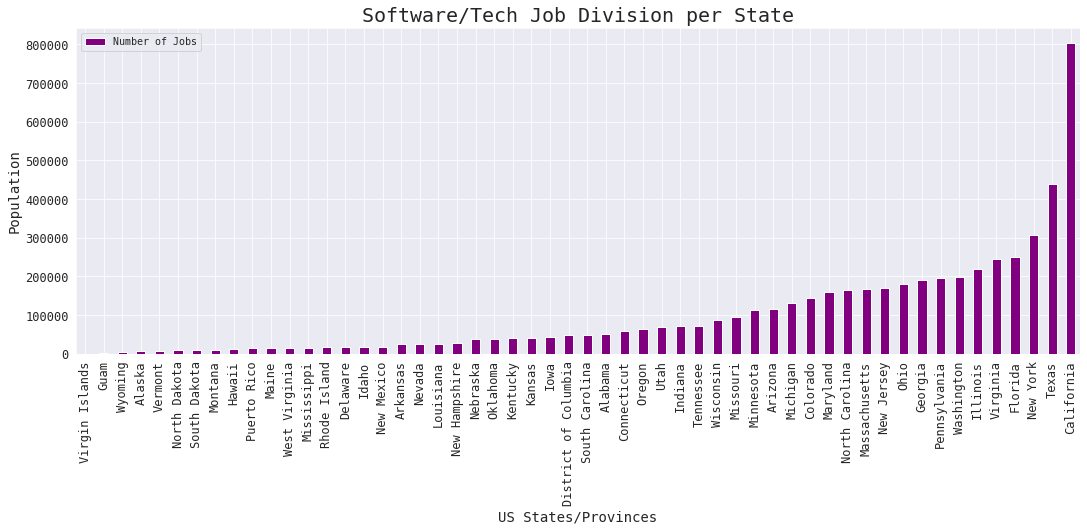

In [31]:
#Job Division per State (US)
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

statetech.sort_values(by = ['tot_emp']).plot(ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('US States/Provinces', fontsize = 14)
plt.title('Software/Tech Job Division per State', fontsize = 20)


Text(0.5, 1.0, 'Software/Tech Job Division by City: Lousiana')

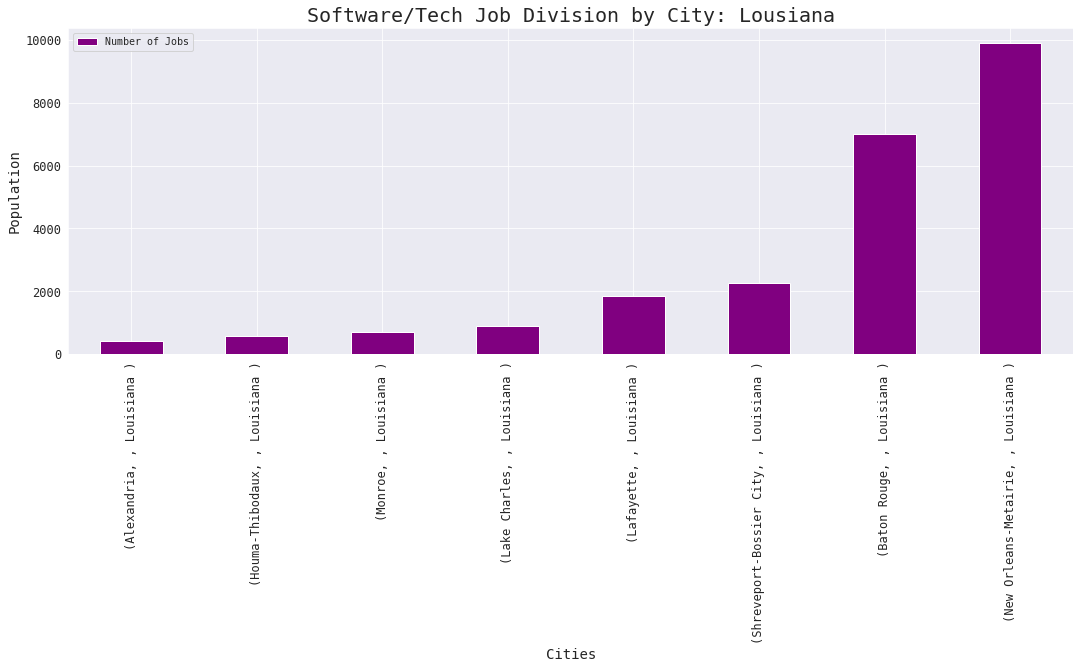

In [32]:
#Louisiana 
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

Louisiana.sort_values(by = ['tot_emp']).plot(ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Lousiana', fontsize = 20)


Text(0.5, 1.0, 'Software/Tech Job Division by City: Mississippi')

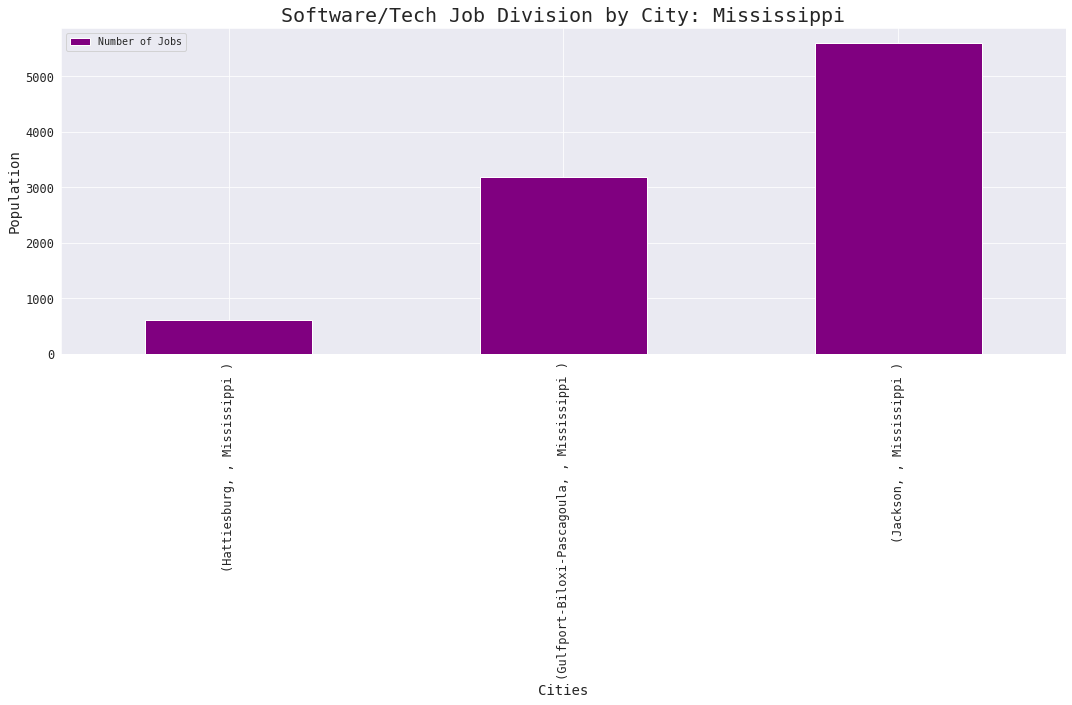

In [33]:
#Mississippi
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

Mississippi.sort_values(by = ['tot_emp']).plot(ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Mississippi', fontsize = 20)


Text(0.5, 1.0, 'Software/Tech Job Division by City: Oklahoma')

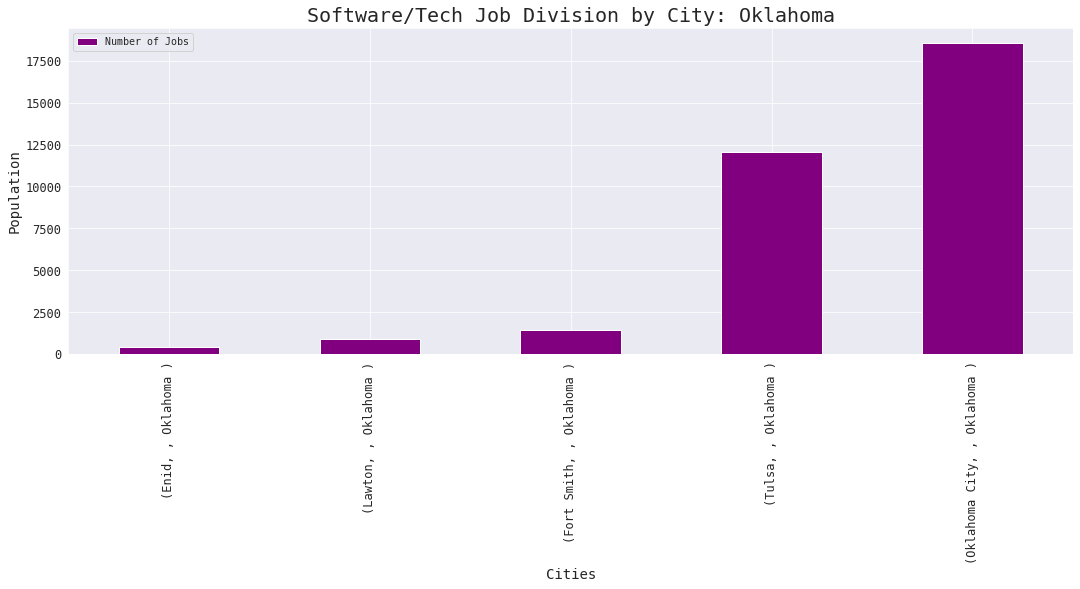

In [34]:
#Oklahoma
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

Oklahoma.sort_values(by = ['tot_emp']).plot(ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20)

Text(0.5, 1.0, 'Software/Tech Job Division by City: Missouri')

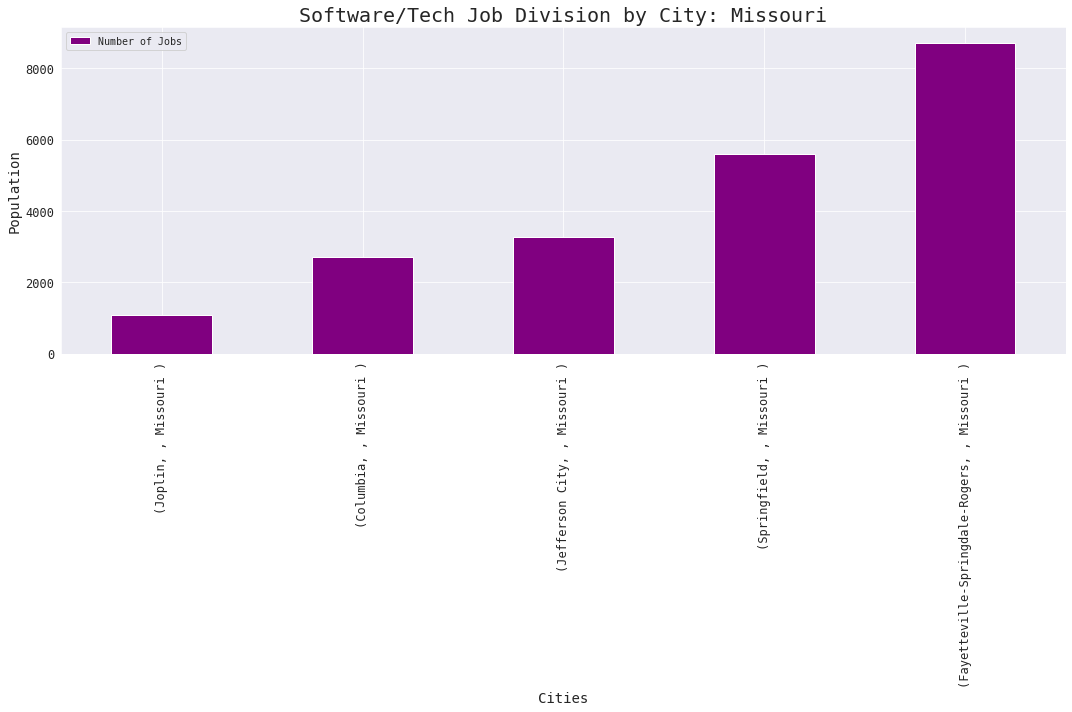

In [35]:
#Missouri
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

Missouri.sort_values(by = ['tot_emp']).plot(ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Missouri', fontsize = 20)

In [36]:
LouisianaU

,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),VariableName,Value,ValueLabel
706,Louisiana State University and Agricultural & ...,22,4138.0,FIPS state code (HD2018),22,Louisiana
707,Louisiana Tech University,22,1810.0,FIPS state code (HD2018),22,Louisiana
708,McNeese State University,22,682.0,FIPS state code (HD2018),22,Louisiana
709,Southern University and A & M College,22,508.0,FIPS state code (HD2018),22,Louisiana
710,Tulane University of Louisiana,22,376.0,FIPS state code (HD2018),22,Louisiana
711,University of Louisiana at Lafayette,22,1829.0,FIPS state code (HD2018),22,Louisiana
712,University of New Orleans,22,940.0,FIPS state code (HD2018),22,Louisiana


Text(0.5, 1.0, 'Software/Tech Job Division by City: Oklahoma')

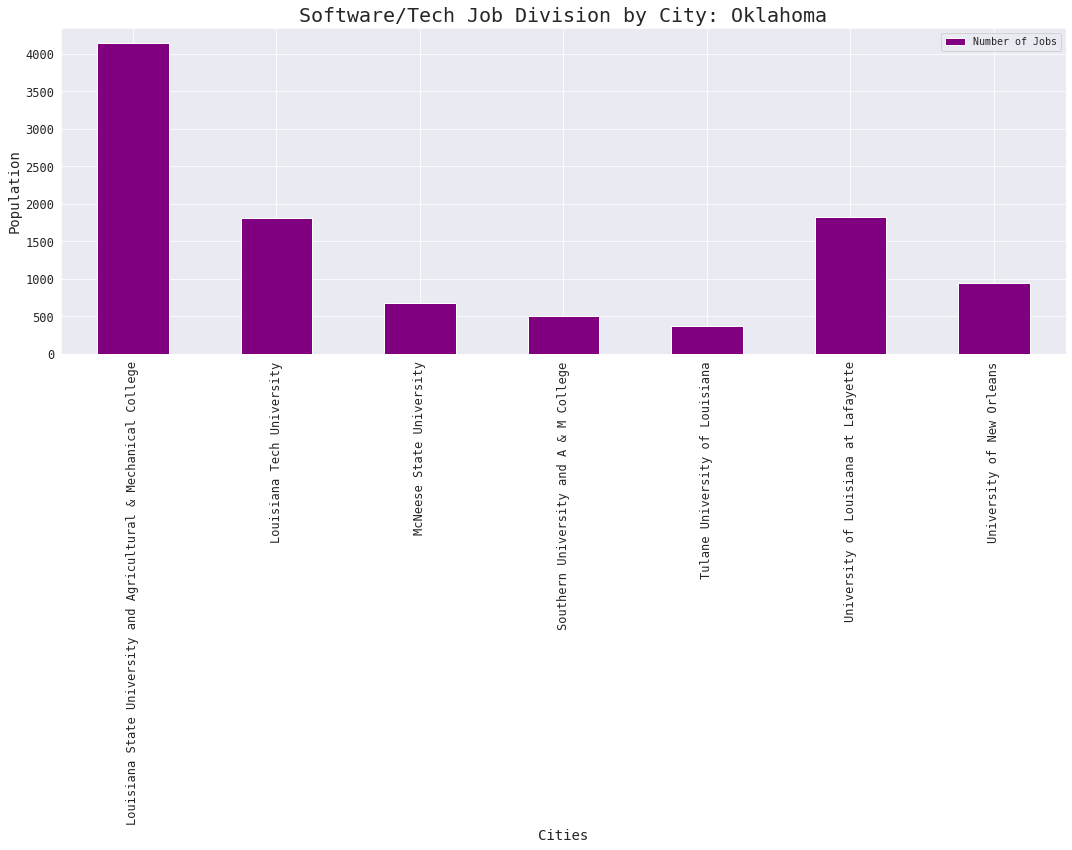

In [38]:
#LouisianaU
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

LouisianaU.plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20)

Text(0.5, 1.0, 'Software/Tech Job Division by City: Oklahoma')

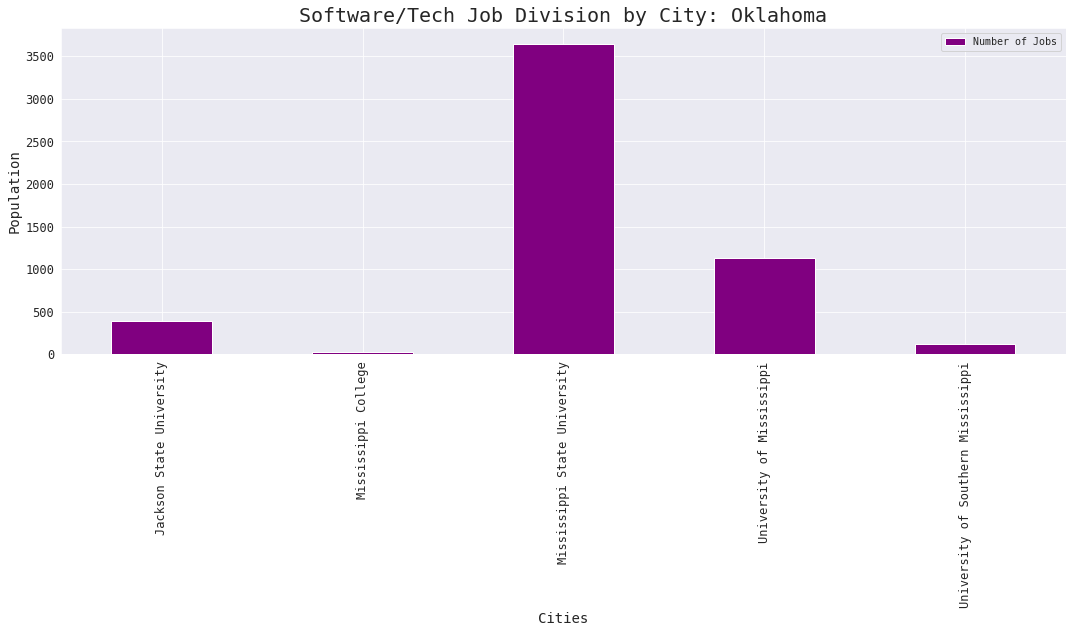

In [39]:
#MississippiU
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

MississippiU.plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20)

Text(0.5, 1.0, 'Software/Tech Job Division by City: Oklahoma')

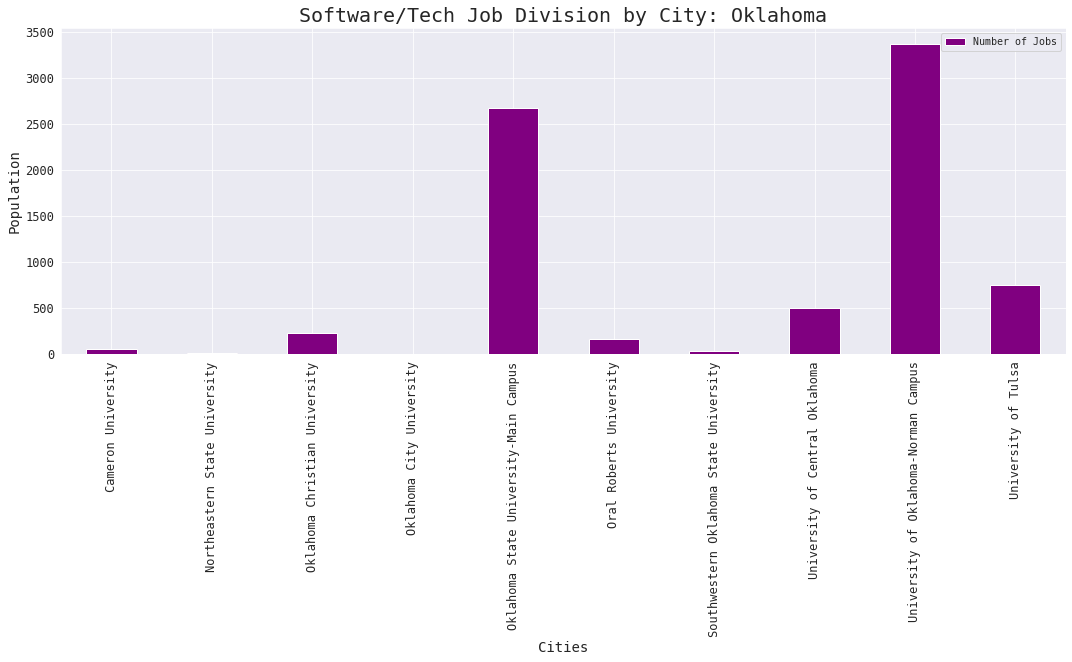

In [41]:
#OklahomaU
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

OklahomaU.plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20)

Text(0.5, 1.0, 'Software/Tech Job Division by City: Oklahoma')

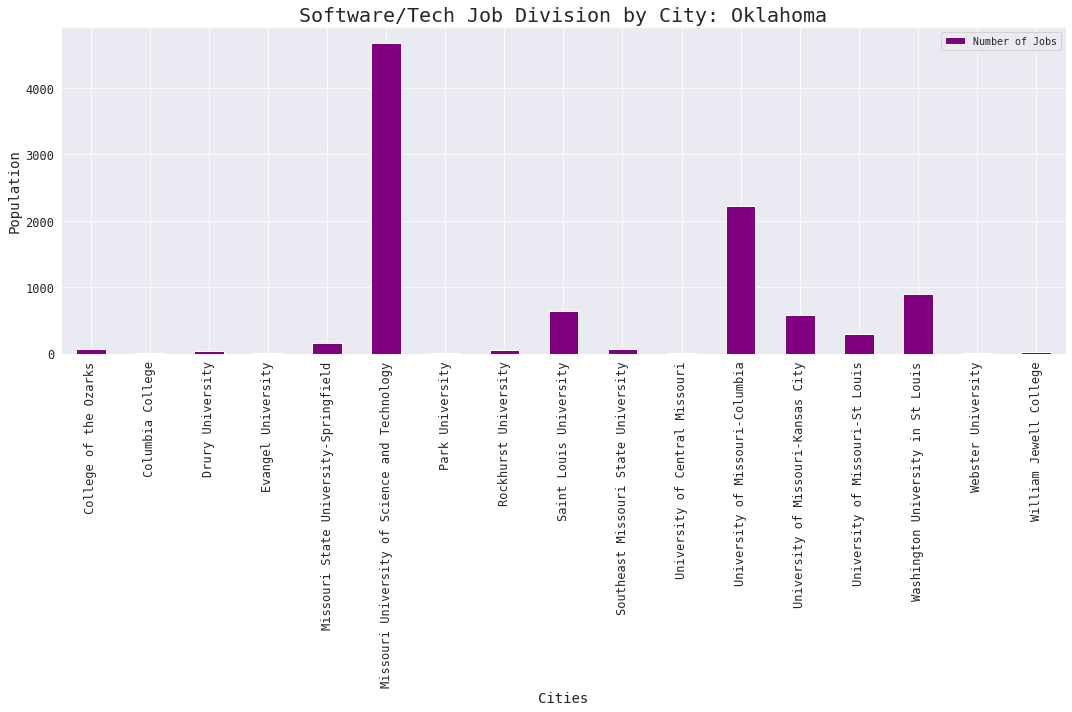

In [42]:
#MissouriU
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

MissouriU.plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax1, kind = 'bar', fontsize = 12, color = 'purple')

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Cities', fontsize = 14)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20)

In [180]:
#from bokeh.io import show
#from bokeh.models import(CDSView,ColorBar, ColumnDataSource, CustomJS,
                        #CustomJSFilter, GeoJSONDataSource, HoverTool,
                        #LinearColorMapper, Slider)
#from bokeh.layouts import column, row, widgetbox
#from bokeh.palettes import brewer
#from bokeh.plotting import figure